# Principal Component Analysis

### Names: Rob Sanchez & Austin Martin

### Due:  Wednesday, March 20

We are going to look at a classic data set consisting of physical measurements of 150 irises.  There are three species of irises in this set&mdash;setosa, versicolor, and virginica&mdash;and there are 50 samples of each species.  Each sample has four measurements, all of which are in centimeters:

* sepal length 
* sepal width
* petal length
* petal width 

In the image below, the sepals are labeled as *falls* and the petals as *standards*.

![](iris.jpg)

The basic problem is to use the four physical measurements to predict which species a given sample belongs to.  This is a standard data set that is used for testing machine learning techniques.  

Since we have 150 samples, each of which has 4 measurements, we are looking at 150 data points in ${\mathbf R}^4$.  That makes it difficult to visualize.  Of course, we could look at scatter plots formed by considering just two measurements at a time, but we'd like to find the best two-dimensional picture of the data.  Principal component analysis is the right tool for doing that.

Evaluate the cell below to read in the data set.  In addition, you will have two familiar functions `findmean(data)`, which returns the mean of the data, and `demean(data)`, which returns the $4\times150$ de-meaned data matrix.  Remember that you have two other useful functions:  `B.matrix_from_columns( list )` and `B.matrix_from_rows( list )`.

In [14]:
import csv
import numpy as np

def findmean(data):
    return vector(np.sum(data, axis=0))/len(data)

def demean(data):
    mean = findmean(data)
    return matrix(RDF, [datum - mean for datum in data]).T

def plot2d(M):
    colors = ['red', 'green', 'blue']
    p = list_plot([])
    for i in range(3):
        p += list_plot(M.columns()[50*i: 50*(i+1)], color = colors[i], aspect_ratio=1, size=30)
    return p


input = csv.reader(open('iris.data'))
data = map(vector, [map(float, datum[:4]) for datum in input])

What is the average petal length in centimeters?

3.76 cm, the 3rd item in the list below.

In [15]:
findmean(data), findmean(data)[2]

((5.8433333333333355, 3.054000000000001, 3.7586666666666697, 1.1986666666666674),
 3.7586666666666697)

Construct the covariance matrix $C$ and display it below.

In [16]:
n = len(data) # num. of obs.
A = demean(data)
C = 1/n * A * A.T
C

[  0.6811222222222221 -0.03900666666666671    1.265191111111111   0.5134577777777778]
[-0.03900666666666671   0.1867506666666668  -0.3195679999999999 -0.11719466666666677]
[   1.265191111111111  -0.3195679999999999   3.0924248888888877    1.287744888888889]
[  0.5134577777777778 -0.11719466666666674   1.2877448888888887   0.5785315555555555]

Find the eigenvalues of the covariance matrix.

{4.197, 0.241, 0.078, 0.024}

In [17]:
eig_vals = C.eigenvalues()
eig_vals

[4.196675163197983,
 0.24062861448333234,
 0.07800041537352656,
 0.023525140278495168]

For what percentage of the total variance do the first two eigenvalues account?

97.8% of the total variance is accounted for with the first two eigenvalues.

In [18]:
(eig_vals[0] + eig_vals[1]) / sum(eig_vals) * 100

97.76317750248033

Find matrices $D$ and $Q$ that orthogonally diagonalize $C$.

In [19]:
D, Q = C.eigenmatrix_right()
D, Q

(
[   4.196675163197985                  0.0                  0.0                  0.0]  [ 0.36158967738144937  -0.6565398832858327  -0.5809972798276174  0.31725454716854123]
[                 0.0  0.24062861448333256                  0.0                  0.0]  [-0.08226888989221476  -0.7297123713264952   0.5964180879381015  -0.3240943524179654]
[                 0.0                  0.0  0.07800041537352653                  0.0]  [  0.8565721052905279   0.1757674034286548  0.07252407548696221 -0.47971898732994017]
[                 0.0                  0.0                  0.0 0.023525140278495192], [ 0.35884392624821554   0.0747064701350339   0.5490609107266057   0.7511205603808221]
)

Verify that the columns of $Q$ are orthonormal.

In [20]:
# the columns of Q are orthogonal if the dot product of each with the others is zero.
# to the computer, the dot products printed below are effectively zero.
q1 = vector(Q[:,0])
q2 = vector(Q[:,1])
q3 = vector(Q[:,2])
q4 = vector(Q[:,3])

print(q1*q2, q1*q3, q1*q4, q2*q3, q2*q4, q3*q4)

# all diagonal entries of Q.T * Q approach or are equal to 1, and the other off-diagonal entries are effectively zero to the computer.
# so the length of each Q column vector is 1.
Q.T * Q

(7.008282842946301e-16, -1.942890293094024e-16, 0.0, 2.789435349370706e-15, -2.8935187579293142e-15, 1.7763568394002505e-15)


[     0.9999999999999999   7.150099494326015e-16 -2.0714669336302253e-16 -1.6269557188872307e-18]
[  7.150099494326015e-16      0.9999999999999999   2.810423863226397e-15 -2.8827970979364073e-15]
[-2.0714669336302253e-16   2.810423863226397e-15      0.9999999999999999  1.7620423713723792e-15]
[-1.6269557188872307e-18 -2.8827970979364073e-15  1.7620423713723792e-15                     1.0]

Suppose that we would like to create a two-dimensional plot of the de-meaned data set by projecting the data onto the two-dimensional subspace $V$ formed by eigenvectors of $C$ corresponding to the two largest eigenvalues.  That is, if ${\mathbf u}_1$ and ${\mathbf u}_2$ are the eigenvectors, we would like to represent a de-meaned data point ${\mathbf x}$ as $(c_1,c_2)$ where the projection of ${\mathbf x}$ onto this subspace is $c_1{\mathbf u}_1 + c_2{\mathbf u}_2$.  Find the matrix $P$ such that $P{\mathbf x} = \begin{bmatrix} c_1 \\ c_2 \end{bmatrix}$.

In [21]:
P = Q.matrix_from_columns([0, 1])
P

[ 0.36158967738144937  -0.6565398832858327]
[-0.08226888989221476  -0.7297123713264952]
[  0.8565721052905279   0.1757674034286548]
[ 0.35884392624821554   0.0747064701350339]

The product $PA$ will give a matrix whose columns consist of the de-meaned data points projected onto the plane.  Construct this product and use the `plot2d` function to display these projected points.  The red points are samples from the setosa species, green are versicolor, and blue are virginica.

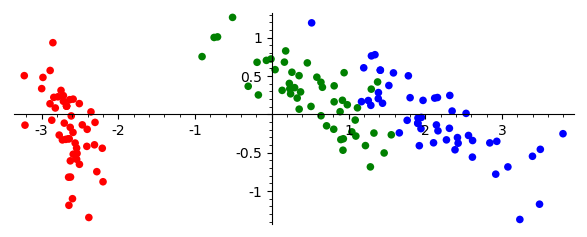

In [22]:
plot2d(P.T * A)

Explain why this plot is wider than it is tall:

The plot is wider than it is tall because the variance of the first component (the eigenvalue corresponding to the first eigenvector), accounts for most (97.8%) of the total variance of in the dataset. In this plot, the first component is represented on the X-axis, and the second component is represented on the Y-axis. The variance of the first component is much larger than the variance of the second component. Thus, the plot is wider than it is tall.

Suppose that you discover a new sample but that you only know two measurements:  the sepal length is 5.65 cm and the sepal width is 2.75 cm.  In this case, you don't know some of the data for this sample.  However, let's make the reasonable assumption that the demeaned data point lies in the two-dimensional subspace $V$.  Find the coordinates $(c_1, c_2)$ of this sample.  You will probably need to think about this task for a little bit to determine a linear system for the coordinates.

In [23]:
# new sample s, only sepal length and sepal width are known.
s = vector([5.65, 2.75, 0, 0])

# de-meaned s
ds = s - findmean(data)

# P.T * ds

# extract first 2 rows of P matrix
M = P.matrix_from_rows([0,1])

# get first two values (s.length & s.width) of de-meaned s
b = vector([ds[0],ds[1]])

# system Mx = b
# solve for x
x = M.inverse() * b

# de-meaned estimate vector
P*x

(-0.19333333333333508, -0.30400000000000116, 0.22724731860487596, 0.09562519431281183)

Estimate the other two measurements, the petal length and the petal width:

petal length: 3.99 cm

petal width:  1.29 cm

In [24]:
# add back the means to find petal length and petal width
P*x + findmean(data)

(5.65, 2.75, 3.9859139852715457, 1.2942918609794793)

To which species does this sample most likely belong:

Versicolor (green cluster)

Suppose you find another sample whose petal length is 1.5 cm and whose petal width is 0.25 cm.  Estimate the other two measurements.

sepal length: 6.55 cm

sepal width:  4.90 cm

In [25]:
# new sample s, only petal length and petal width are known.
s = vector([0,0,1.5,0.25])

# de-meaned s
ds = s - findmean(data)

# extract last 2 rows of P matrix
M = P.matrix_from_rows([2,3])

# get last two values (p.length & p.width) of de-meaned s
b = vector([ds[2],ds[3]])

# system Mx = b
# solve for x
x = M.inverse() * b

# de-meaned estimate vector
P*x

(0.7115094156733177, 1.8411053472293042, -2.2586666666666506, -0.9486666666666592)

In [26]:
# add back the means to find sepal length and sepal width
P*x + findmean(data)

(6.554842749006653, 4.895105347229306, 1.500000000000019, 0.2500000000000082)

To which species does this sample most likely belong:

Virginica (blue cluster)